# Zestaw 2
### Autor: Jacek Nitychoruk

## Funkcje
Poniżej moja własna implementacja funkcji obliczających iloczyn skalarny i możący macierz przez wektor:
### Obliczanie iloczynu skalarnego wektorów

In [3]:
function dot(x,y)
    if length(x) != length(y)
       return 0
    end
    sum = 0
    for i in 1:length(x)
        sum += x[i]*y[i]
    end
    return sum
end

dot (generic function with 1 method)

### Mnożenie macierzy przez wektor

In [4]:
function Base.:*(matrix::Array{Int64,2}, vector::Array{Int64,1})
    res = Vector()
    for i in 1:length(matrix[:,1])
        push!(res, dot(matrix[i,:], vector))
    end
    return res
end

#### Sprawdzenie poprawności

In [5]:
x = 1:3
y = 2:4
dot(x, y)

20

In [6]:
m = [1 4 3; 1 2 1]
v = [2,2,2]
m*v

2-element Array{Any,1}:
 16
  8

Jak widać na przykładach powyżej, napisane funkcje działają poprawnie. 

### Testy z pomiarem czasu

Kod poniżej wykonuje 10 testów (po 10 powtórzeń każdy) przy różnej długości wektorów i macierzy w zakresie od 500 do 5000 ze skokiem co 500. Wyniki są zapisywane do pliku *results.csv*.

In [44]:
using CSV, DataFrames

res = DataFrame(size = Int64[], iteration = Int64[], time_vector = Float64[], time_matrix = Float64[])
for i in 1:1:10
    size=i*500
    for j in 0:10
        v = Vector(1:size)
        m = Vector(1:size^2)
        m = reshape(m, (size, size))
        time_vec = (@elapsed dot(v,v))
        time_matrix = (@elapsed m*v)
        if (j>0)
            push!(res, [size j time_vec time_matrix])
        end
    end
end


CSV.write("results.csv",  res)

"results.csv"

### Wczytywanie danych z pliku

Poniższy kod wczytuje dane z pliku, tworzy podsumowanie, grupując dane wegług parametrów pomiaru i generuje wykresy czasu wykonywania operacji od wielkości wektora i macierzy.

In [48]:
using CSV
using DataFrames
using Statistics
using Plots

data=DataFrame()
data=CSV.read("results.csv", delim=",")

,size,iteration,time_vector,time_matrix
,Int64,Int64,Float64,Float64
1,500,1,1.2e-6,0.000760799
2,500,2,1.7e-6,0.0007767
3,500,3,1.1e-6,0.001112
4,500,4,1.7e-6,0.0018831
5,500,5,1.6e-6,0.0017157
6,500,6,1.5e-6,0.0016582
7,500,7,1.1e-6,0.0684774
8,500,8,1.8e-6,0.0010937
9,500,9,1.2e-6,0.0010211


In [49]:
gdf=by(data, :size, 
    avg_vector_time=:time_vector => mean,
    std_vector_time=:time_vector => std,
    avg_matrix_time=:time_matrix => mean,
    std_matrix_time=:time_matrix => std)

,size,avg_vector_time,std_vector_time,avg_matrix_time,std_matrix_time
,Int64,Float64,Float64,Float64,Float64
1,500,1.42e-6,2.69979e-7,0.00792963,0.0212783
2,1000,1.8702e-6,2.75181e-7,0.00523748,0.00109055
3,1500,2.86e-6,7.0073e-7,0.0138742,0.00886268
4,2000,3.2601e-6,1.04156e-6,0.0361665,0.0110172
5,2500,3.7802e-6,5.84645e-7,0.0595807,0.0149201
6,3000,4.8698e-6,1.37917e-6,0.0871044,0.00909538
7,3500,4.96e-6,8.73321e-7,0.133593,0.00829615
8,4000,5.31e-6,6.85517e-7,0.190585,0.0164477
9,4500,6.0001e-6,1.17171e-6,0.242093,0.0116222


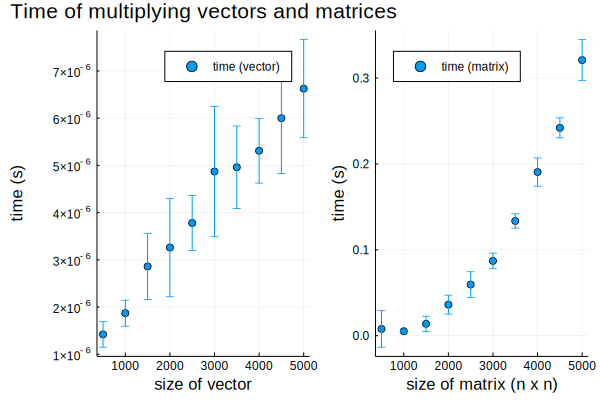

In [50]:
p1 = scatter(gdf.size,
    gdf.avg_vector_time,
    yerr=gdf.std_vector_time,
    title = "Time of multiplying vectors and matrices",
    label="time (vector)",
    xlabel="size of vector",
    ylabel="time (s)")

p2 = scatter(gdf.size,
    gdf.avg_matrix_time,
    yerr=gdf.std_matrix_time,
    label="time (matrix)",
    xlabel="size of matrix (n x n)",
    ylabel="time (s)",
    legend=:topleft)
plot(p1, p2, layout=(1,2), )

#### Komentarz:
Jak można zauważyć na wykresach, czasy wykonywania operacji zachowują się zgodnie z przewidywaniami. Pierwszy z nich - mnożenie wektorów - rośnie liniowo, a drugi - mnożenie macierzy - rośnie z kwadratem długości boku macierzy.